<a href="https://colab.research.google.com/github/EngrIBGIT/EngrIBGIT/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Jose Lects/DATA/Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

#### Dealing with Outliers

In [ ]:
def create_ages(mu=50, sigma=13, num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call
    # We set seed to 42 (42 is arbitrary choice from Hitch)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)

    return sample_ages

In [ ]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

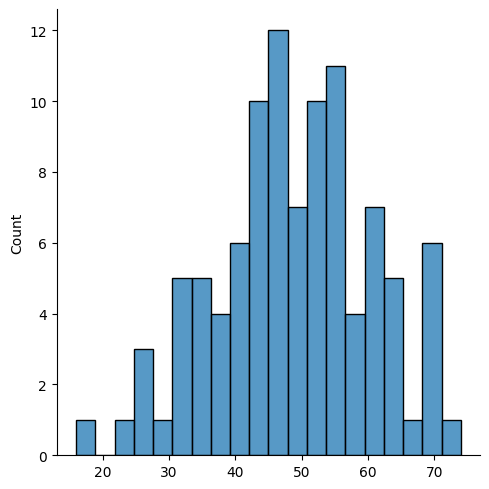

In [ ]:
sns.displot(sample, bins=20);

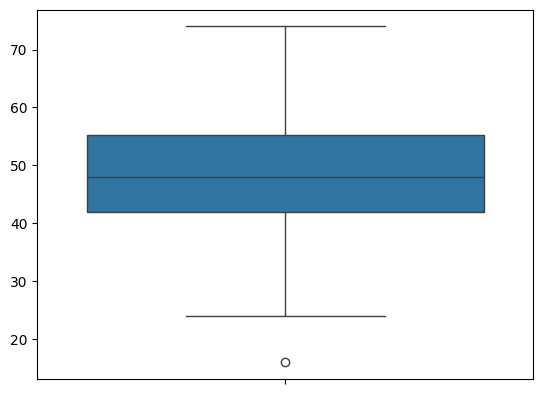

In [ ]:
sns.boxplot(data = sample, orient=True);

In [ ]:
ser = pd.Series(sample)
ser

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [ ]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [ ]:
IQR = 55.25 - 42.0
lower_limit = 42 - 1.5*(IQR)
lower_limit

22.125

In [ ]:
ser[ser > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [ ]:
q75, q25 = np.percentile(sample, [75,25])

In [ ]:
q75, q25

(55.25, 42.0)

In [ ]:
iqr = q75 - q25

In [ ]:
lw = q25 - 1.5*iqr
lw

22.125

In [ ]:
df = pd.read_csv('Jose Lects/DATA/Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df = pd.get_dummies(df)
df.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,False,False,False,True,False,False,False,False,True,False
1,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
2,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
3,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,...,False,False,False,True,False,False,False,False,True,False
4,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df.corr()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.142311,0.008600,0.018679,0.100798,0.046419,0.065540,0.085883,-0.007869,0.041617,-0.138157
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.042283,-0.018319,-0.016205,0.042020,0.002159,0.010825,0.036657,-0.023817,0.029912,-0.046850
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.117402,-0.004020,0.013674,-0.088994,0.003305,-0.046570,0.008221,0.017134,-0.087860,0.115187
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.032328,-0.003937,0.008495,-0.015027,-0.014079,-0.020244,0.024450,0.018232,-0.024052,0.034169
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.336153,-0.052845,-0.014340,-0.191898,-0.127738,-0.049768,-0.041004,-0.024062,-0.131968,0.331010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,0.065540,0.010825,-0.046570,-0.020244,-0.049768,-0.051729,-0.077805,-0.078199,-0.018508,-0.028191,...,-0.019111,-0.003138,-0.001185,0.025277,-0.016887,1.000000,-0.005828,-0.008099,-0.138542,-0.019371
Sale Condition_Alloca,0.085883,0.036657,0.008221,0.024450,-0.041004,-0.025606,-0.025238,-0.034022,-0.018204,0.025815,...,-0.027083,-0.004447,-0.001679,0.035820,-0.023931,-0.005828,1.000000,-0.011477,-0.196332,-0.027452
Sale Condition_Family,-0.007869,-0.023817,0.017134,0.018232,-0.024062,-0.031880,-0.036261,-0.049793,-0.017752,-0.026518,...,-0.037638,0.050057,-0.002334,-0.014601,-0.033257,-0.008099,-0.011477,1.000000,-0.272844,-0.038150
Sale Condition_Normal,0.041617,0.029912,-0.087860,-0.024052,-0.131968,0.167683,-0.137162,-0.102775,-0.070820,-0.016444,...,-0.643836,-0.087383,0.008553,0.620601,-0.568899,-0.138542,-0.196332,-0.272844,1.000000,-0.652596


In [ ]:
df.corr()['SalePrice'].sort_values()

Exter Qual_TA        -0.590897
Kitchen Qual_TA      -0.526721
Bsmt Qual_TA         -0.452487
Garage Finish_Unf    -0.421876
Garage Type_Detchd   -0.365074
                        ...   
Garage Area           0.640401
Garage Cars           0.647877
Gr Liv Area           0.706780
Overall Qual          0.799262
SalePrice             1.000000
Name: SalePrice, Length: 305, dtype: float64

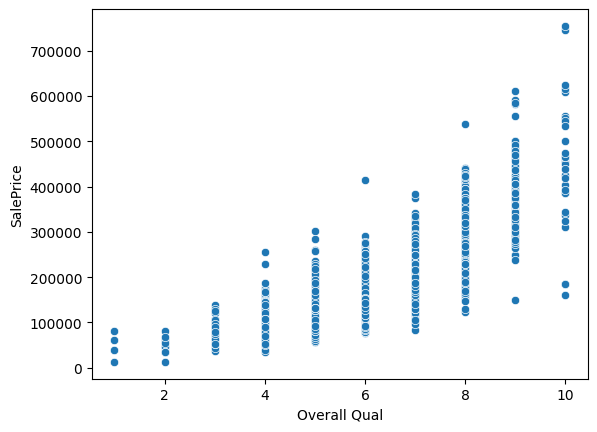

In [ ]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data = df);

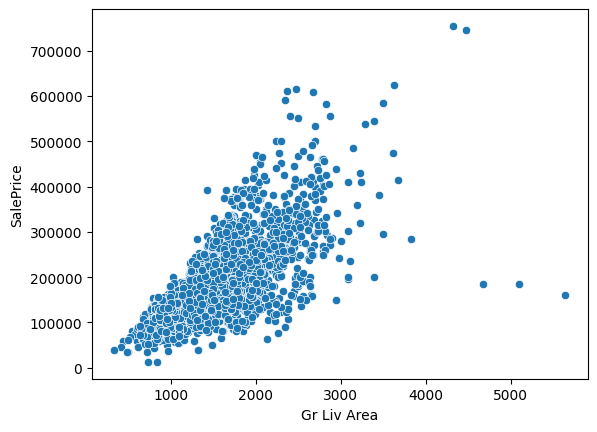

In [ ]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data = df);

In [ ]:
df[(df['Overall Qual']>8) & (df['SalePrice']< 200000)]

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1182,533350090,60,NaN,24572,9,3,1977,1977,1050.0,410.0,...,False,False,False,True,False,False,False,True,False,False
1498,908154235,60,313.0,63887,10,5,2008,2008,796.0,5644.0,...,True,False,False,False,False,False,False,False,False,True
2180,908154195,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,...,True,False,False,False,False,False,False,False,False,True
2181,908154205,60,130.0,40094,10,5,2007,2008,762.0,2260.0,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1498,908154235,60,313.0,63887,10,5,2008,2008,796.0,5644.0,...,True,False,False,False,False,False,False,False,False,True
2180,908154195,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,...,True,False,False,False,False,False,False,False,False,True
2181,908154205,60,130.0,40094,10,5,2007,2008,762.0,2260.0,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [ ]:
df = df.drop(drop_ind, axis=0)

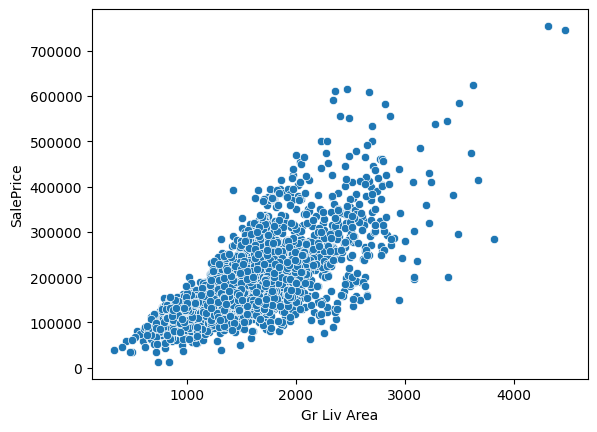

In [ ]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data = df);

In [ ]:
df.to_csv('Ames_outliers_REM')

In [ ]:
with open('Jose Lects/DATA/Ames_Housing_Feature_description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
df = pd.read_csv('Jose Lects/DATA/Ames_outliers_removed.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [ ]:
df.shape

(2927, 81)

In [ ]:
df = df.drop('PID', axis=1)
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [ ]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [ ]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

In [ ]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

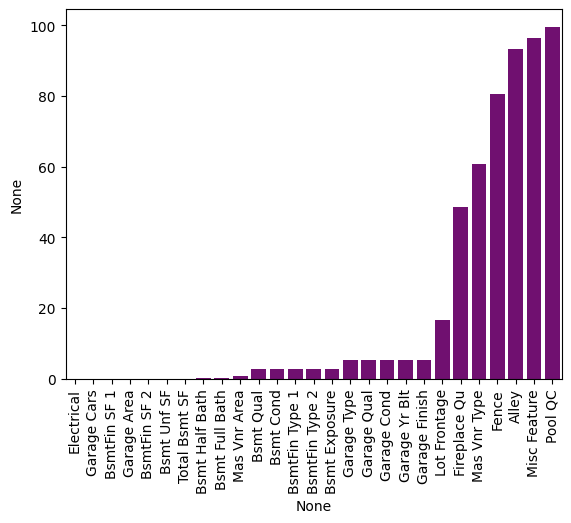

In [ ]:
sns.barplot(x=percent_nan.index, y=percent_nan, color = 'purple' )
plt.xticks(rotation=90);

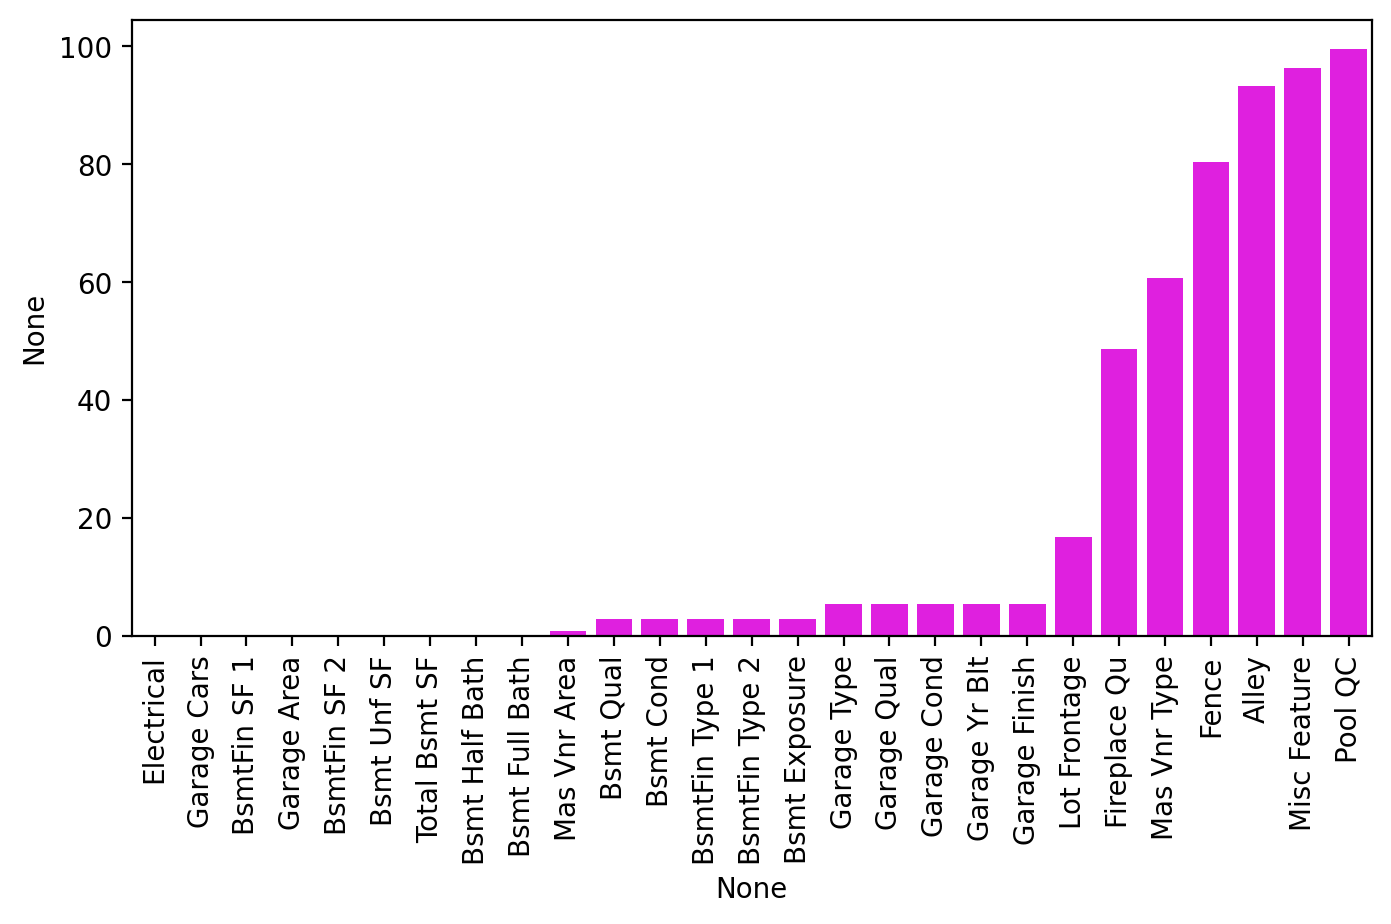

In [ ]:
plt.figure(figsize=(8,4,), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan, color='magenta')
plt.xticks(rotation=90);

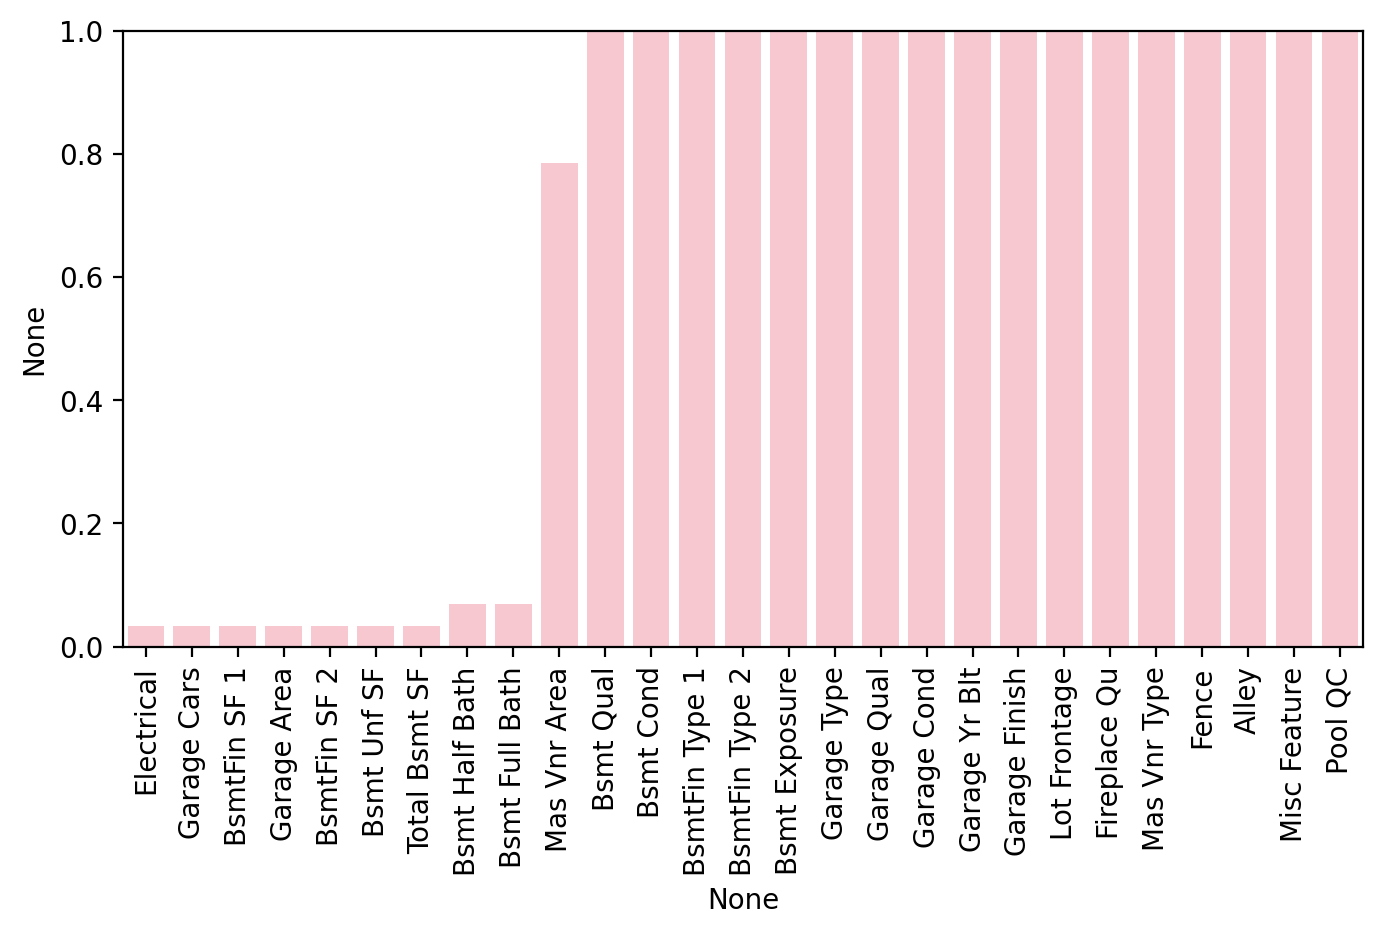

In [ ]:
plt.figure(figsize=(8,4,), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan, color='pink')
plt.xticks(rotation=90)
plt.ylim(0,1);

In [ ]:
percent_nan[percent_nan <1 ]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [ ]:
100/len(df)

0.0341646737273659

In [ ]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [ ]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [ ]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

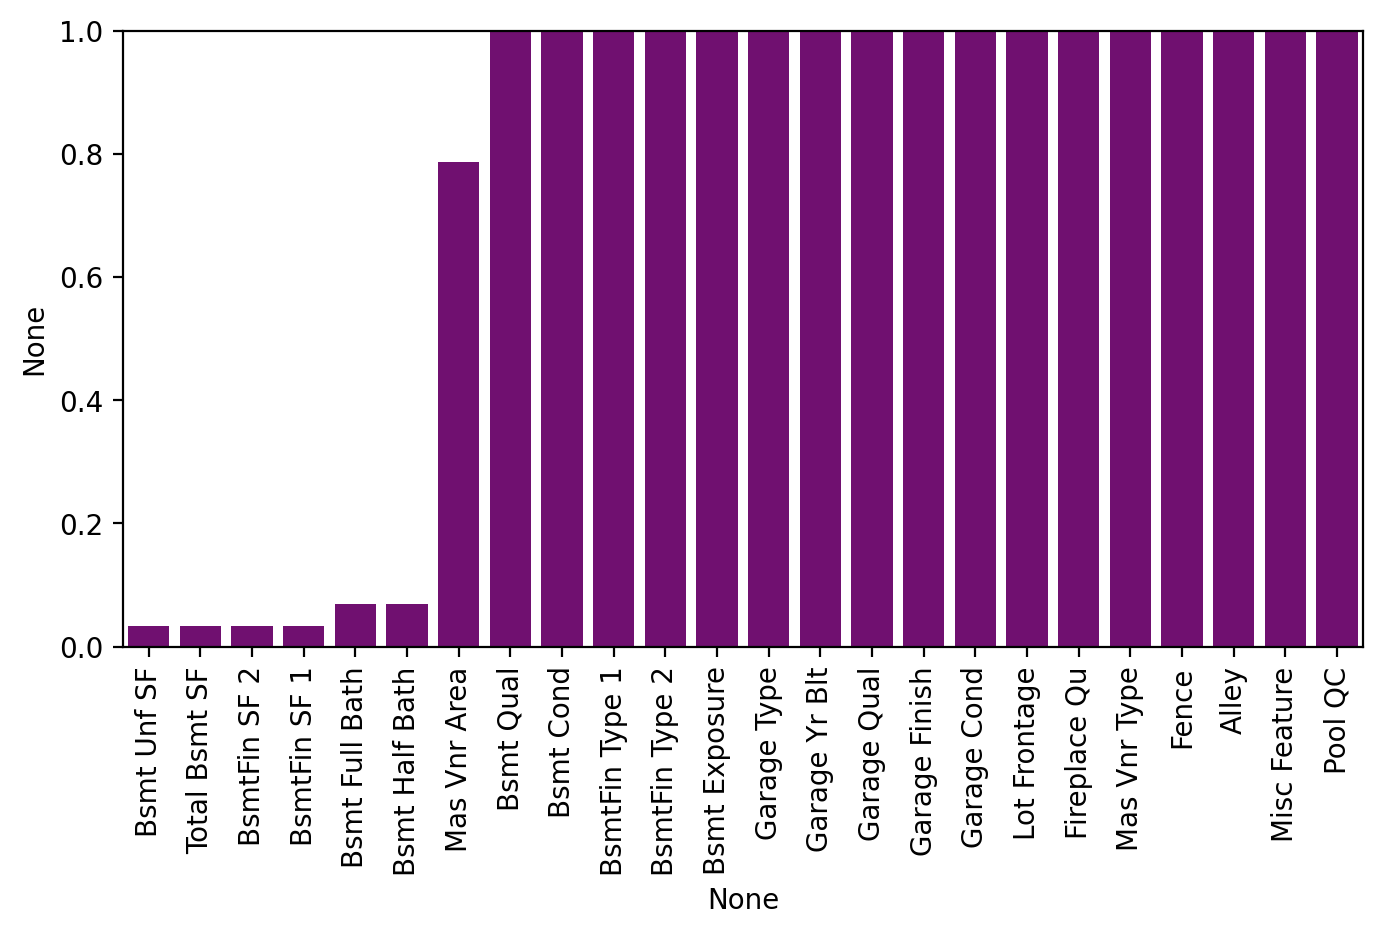

In [ ]:
plt.figure(figsize=(8,4,), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan, color='purple')
plt.xticks(rotation=90)
plt.ylim(0,1);

In [ ]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [ ]:
# BSMT NUMERIC COLUMNS ----> fillna (0)
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# BSMT STRING COLUMNS ---->

bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [ ]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [ ]:
percent_nan = percent_missing(df)

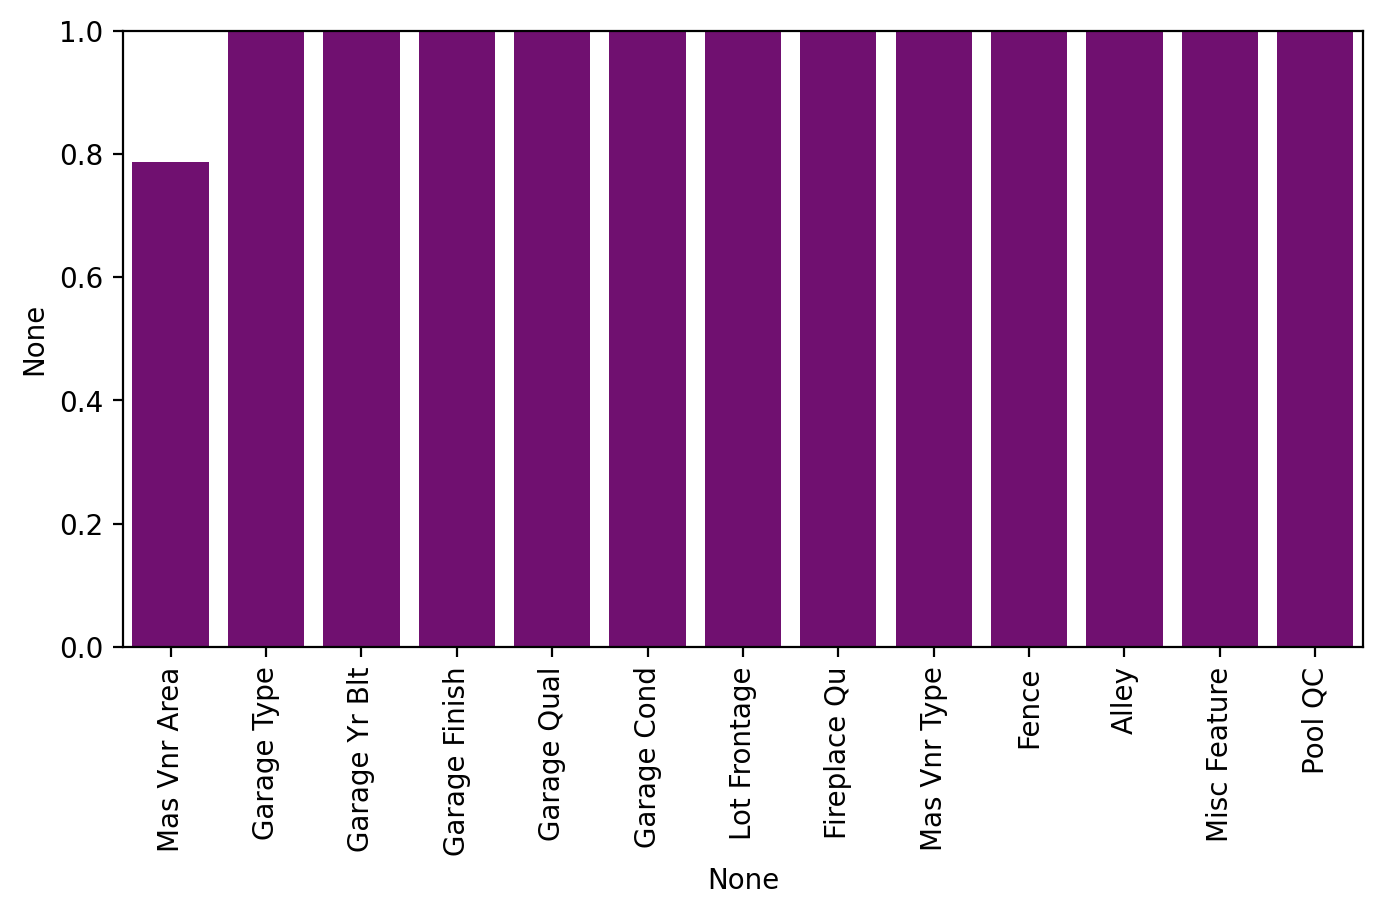

In [ ]:
plt.figure(figsize=(8,4,), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan, color='purple')
plt.xticks(rotation=90)
plt.ylim(0,1);

In [ ]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [ ]:
df['Mas Vnr Area'] = df['Mas Vnr Type'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

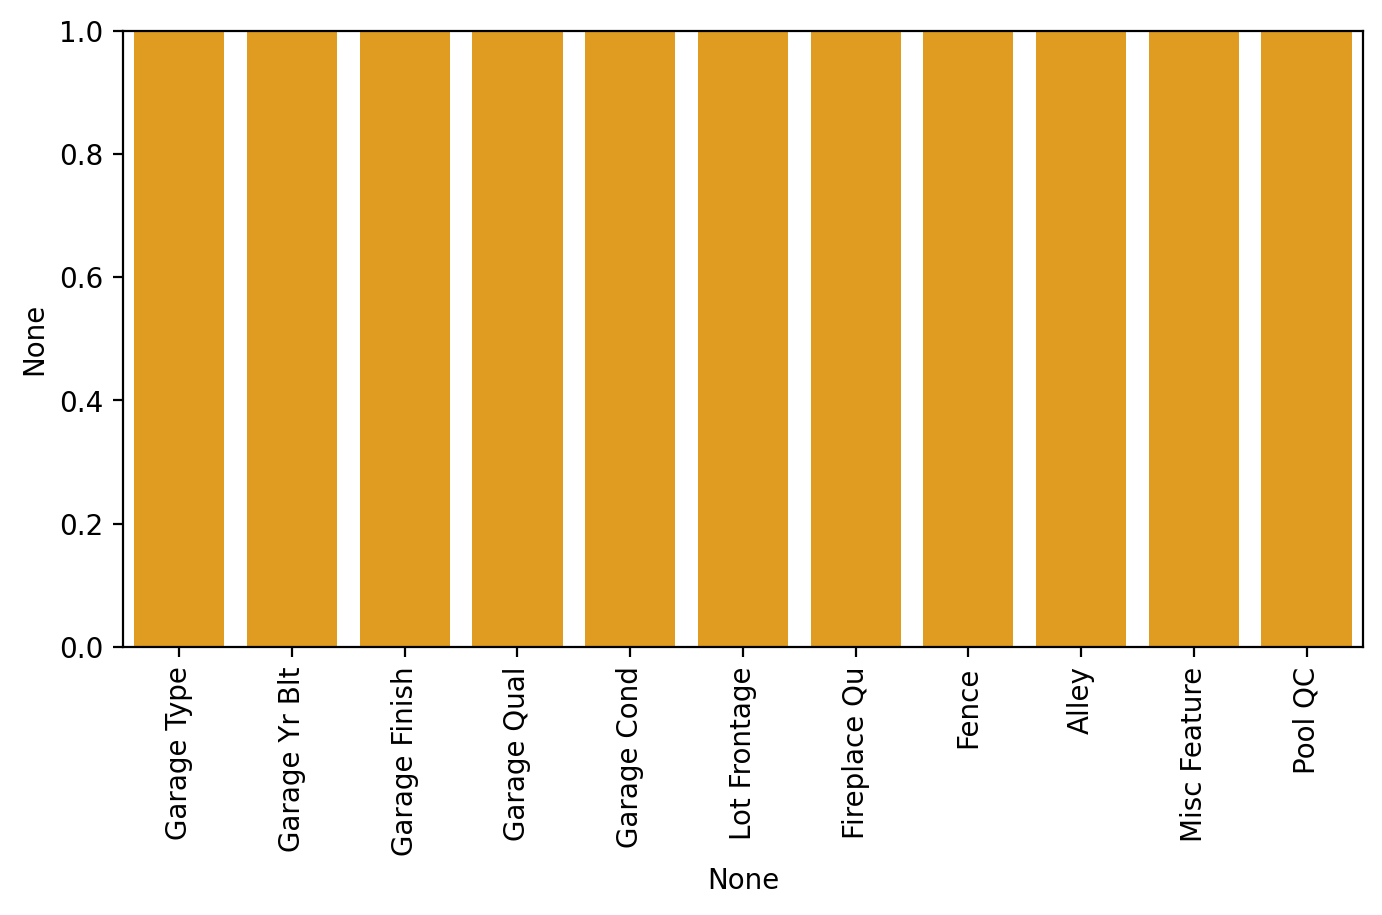

In [ ]:
plt.figure(figsize=(8,4,), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan, color='orange')
plt.xticks(rotation=90)
plt.ylim(0,1);

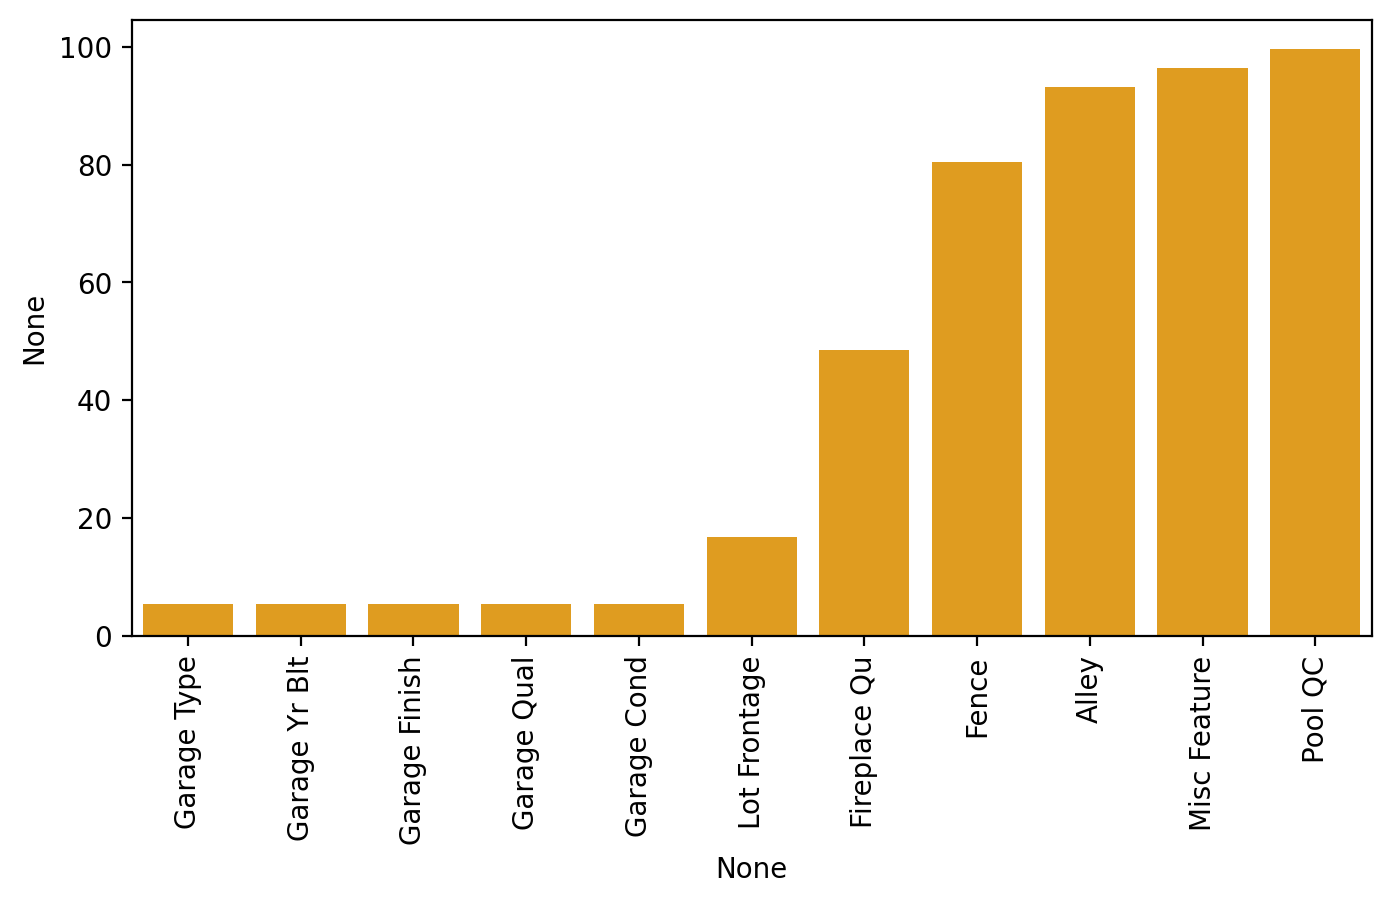

In [ ]:
plt.figure(figsize=(8,4,), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan, color='orange')
plt.xticks(rotation=90);

In [ ]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [ ]:
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [ ]:
percent_nan = percent_missing(df)

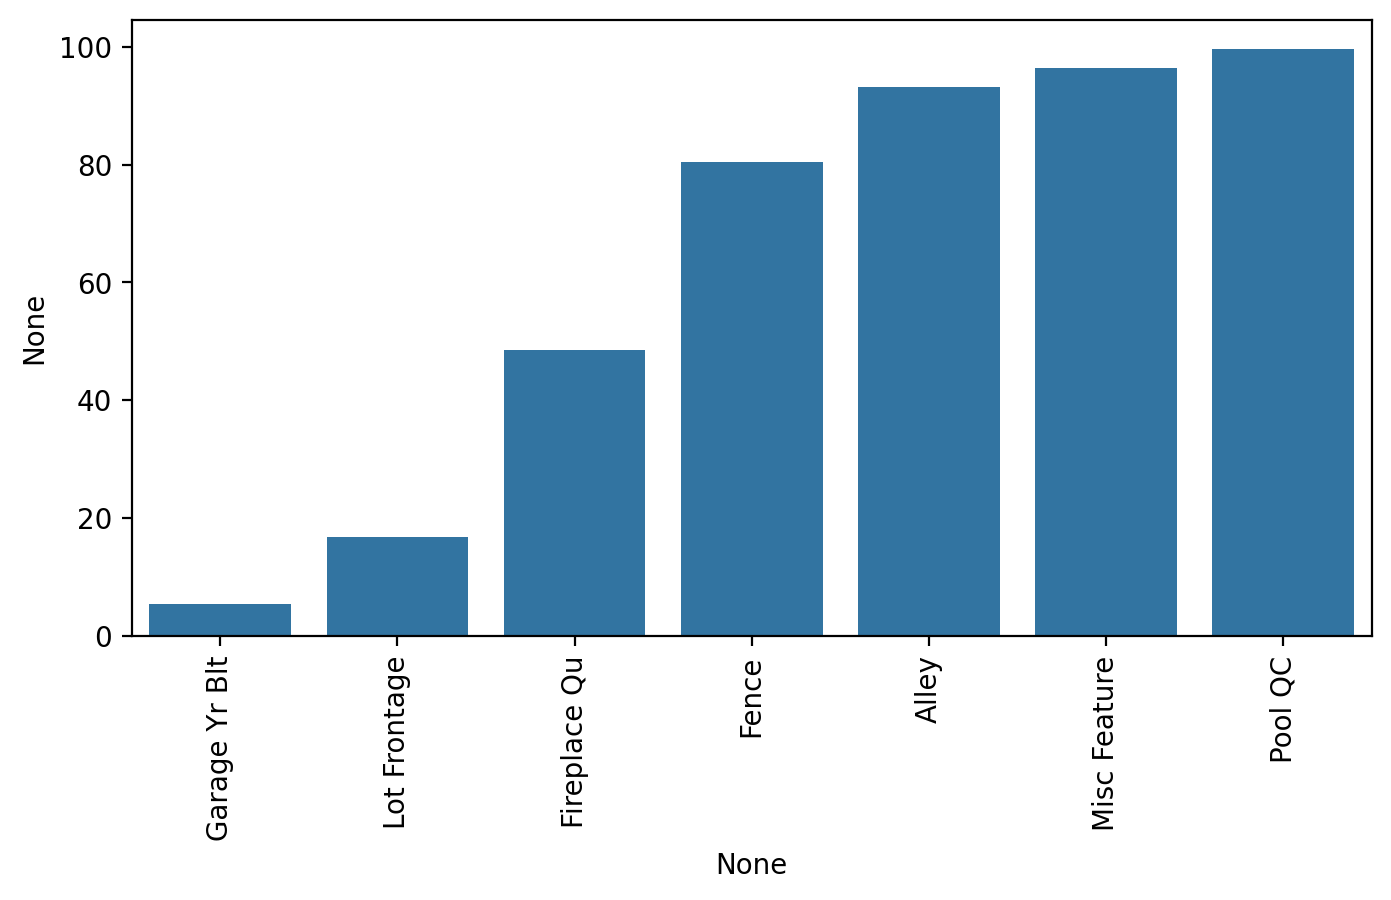

In [ ]:
plt.figure(figsize=(8,4,), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

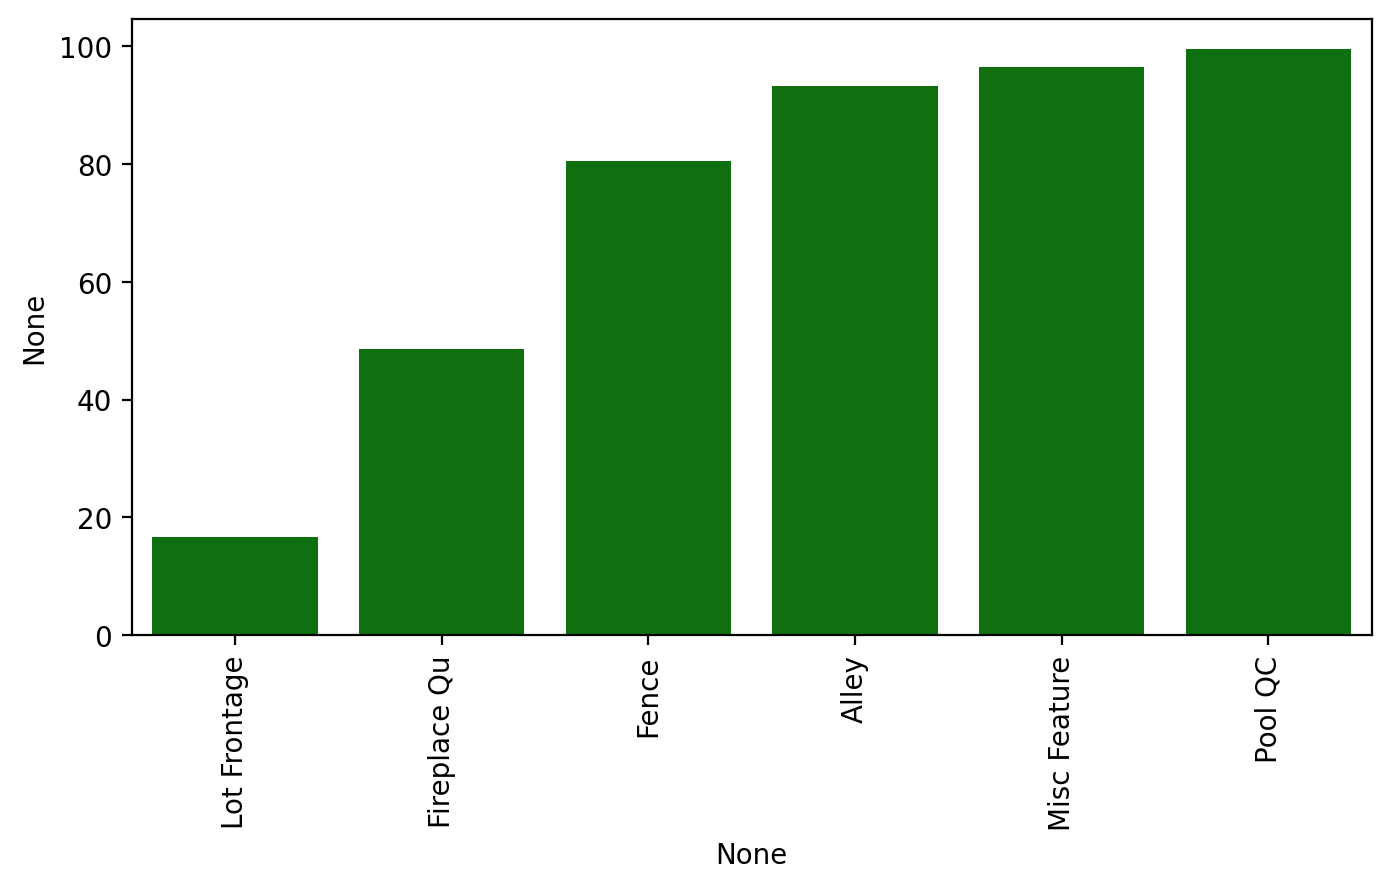

In [ ]:
plt.figure(figsize=(8,4,), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan, color='green')
plt.xticks(rotation=90);

In [ ]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [ ]:
percent_nan = percent_missing(df)

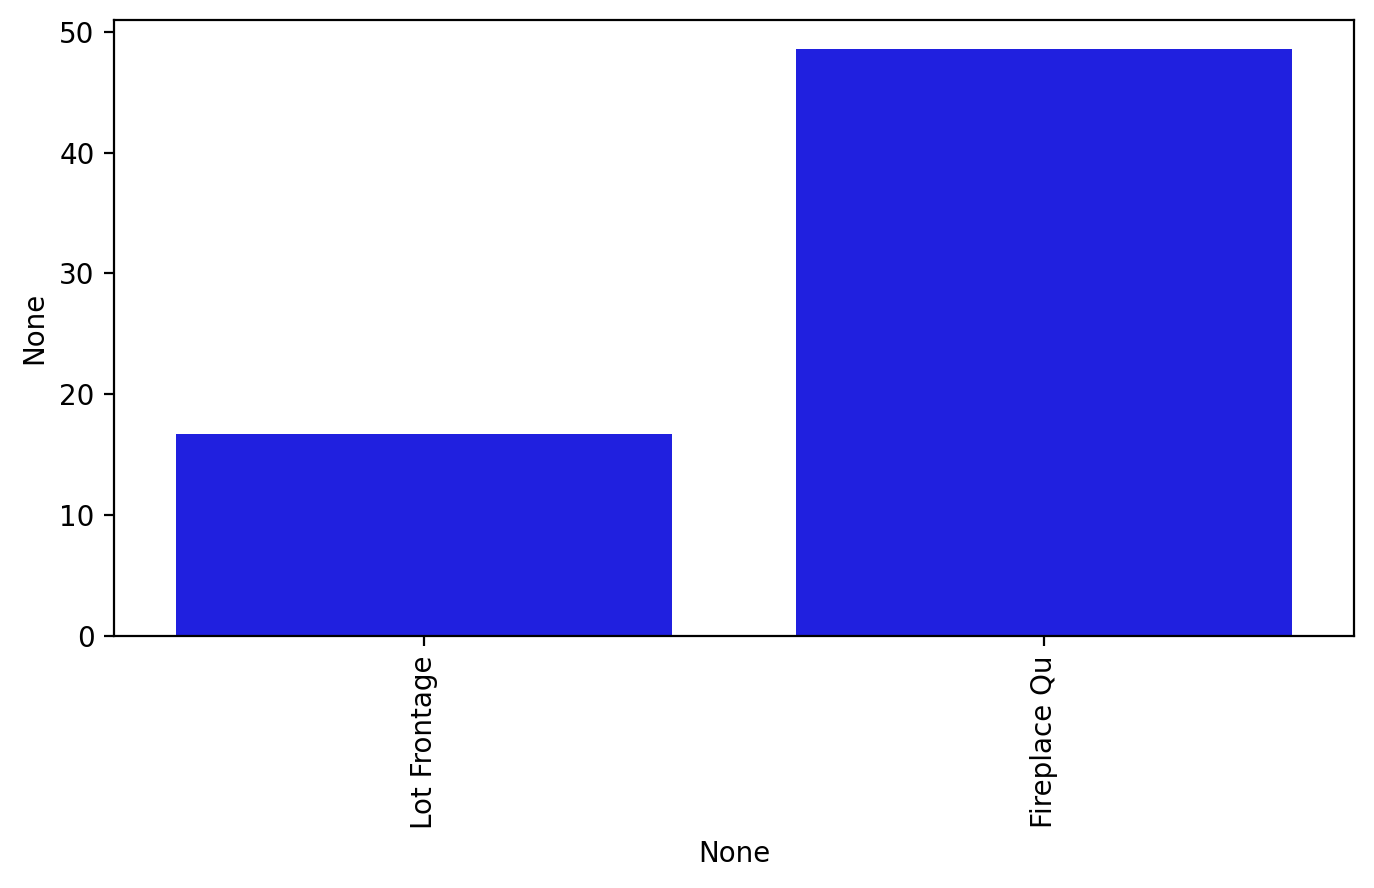

In [ ]:
plt.figure(figsize=(8,4,), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan, color='blue')
plt.xticks(rotation=90);

In [ ]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [ ]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [ ]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

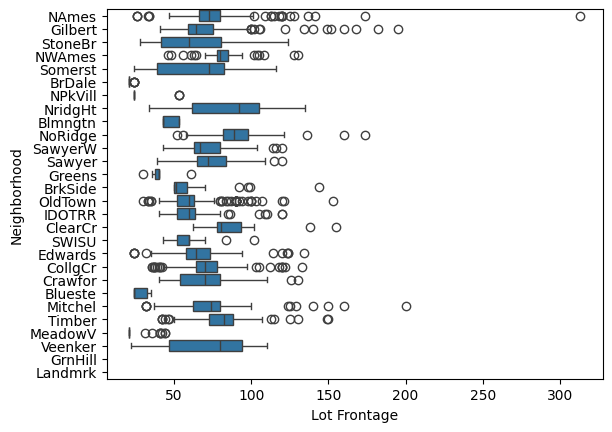

In [ ]:
sns.boxplot(x='Lot Frontage', y='Neighborhood', data = df);

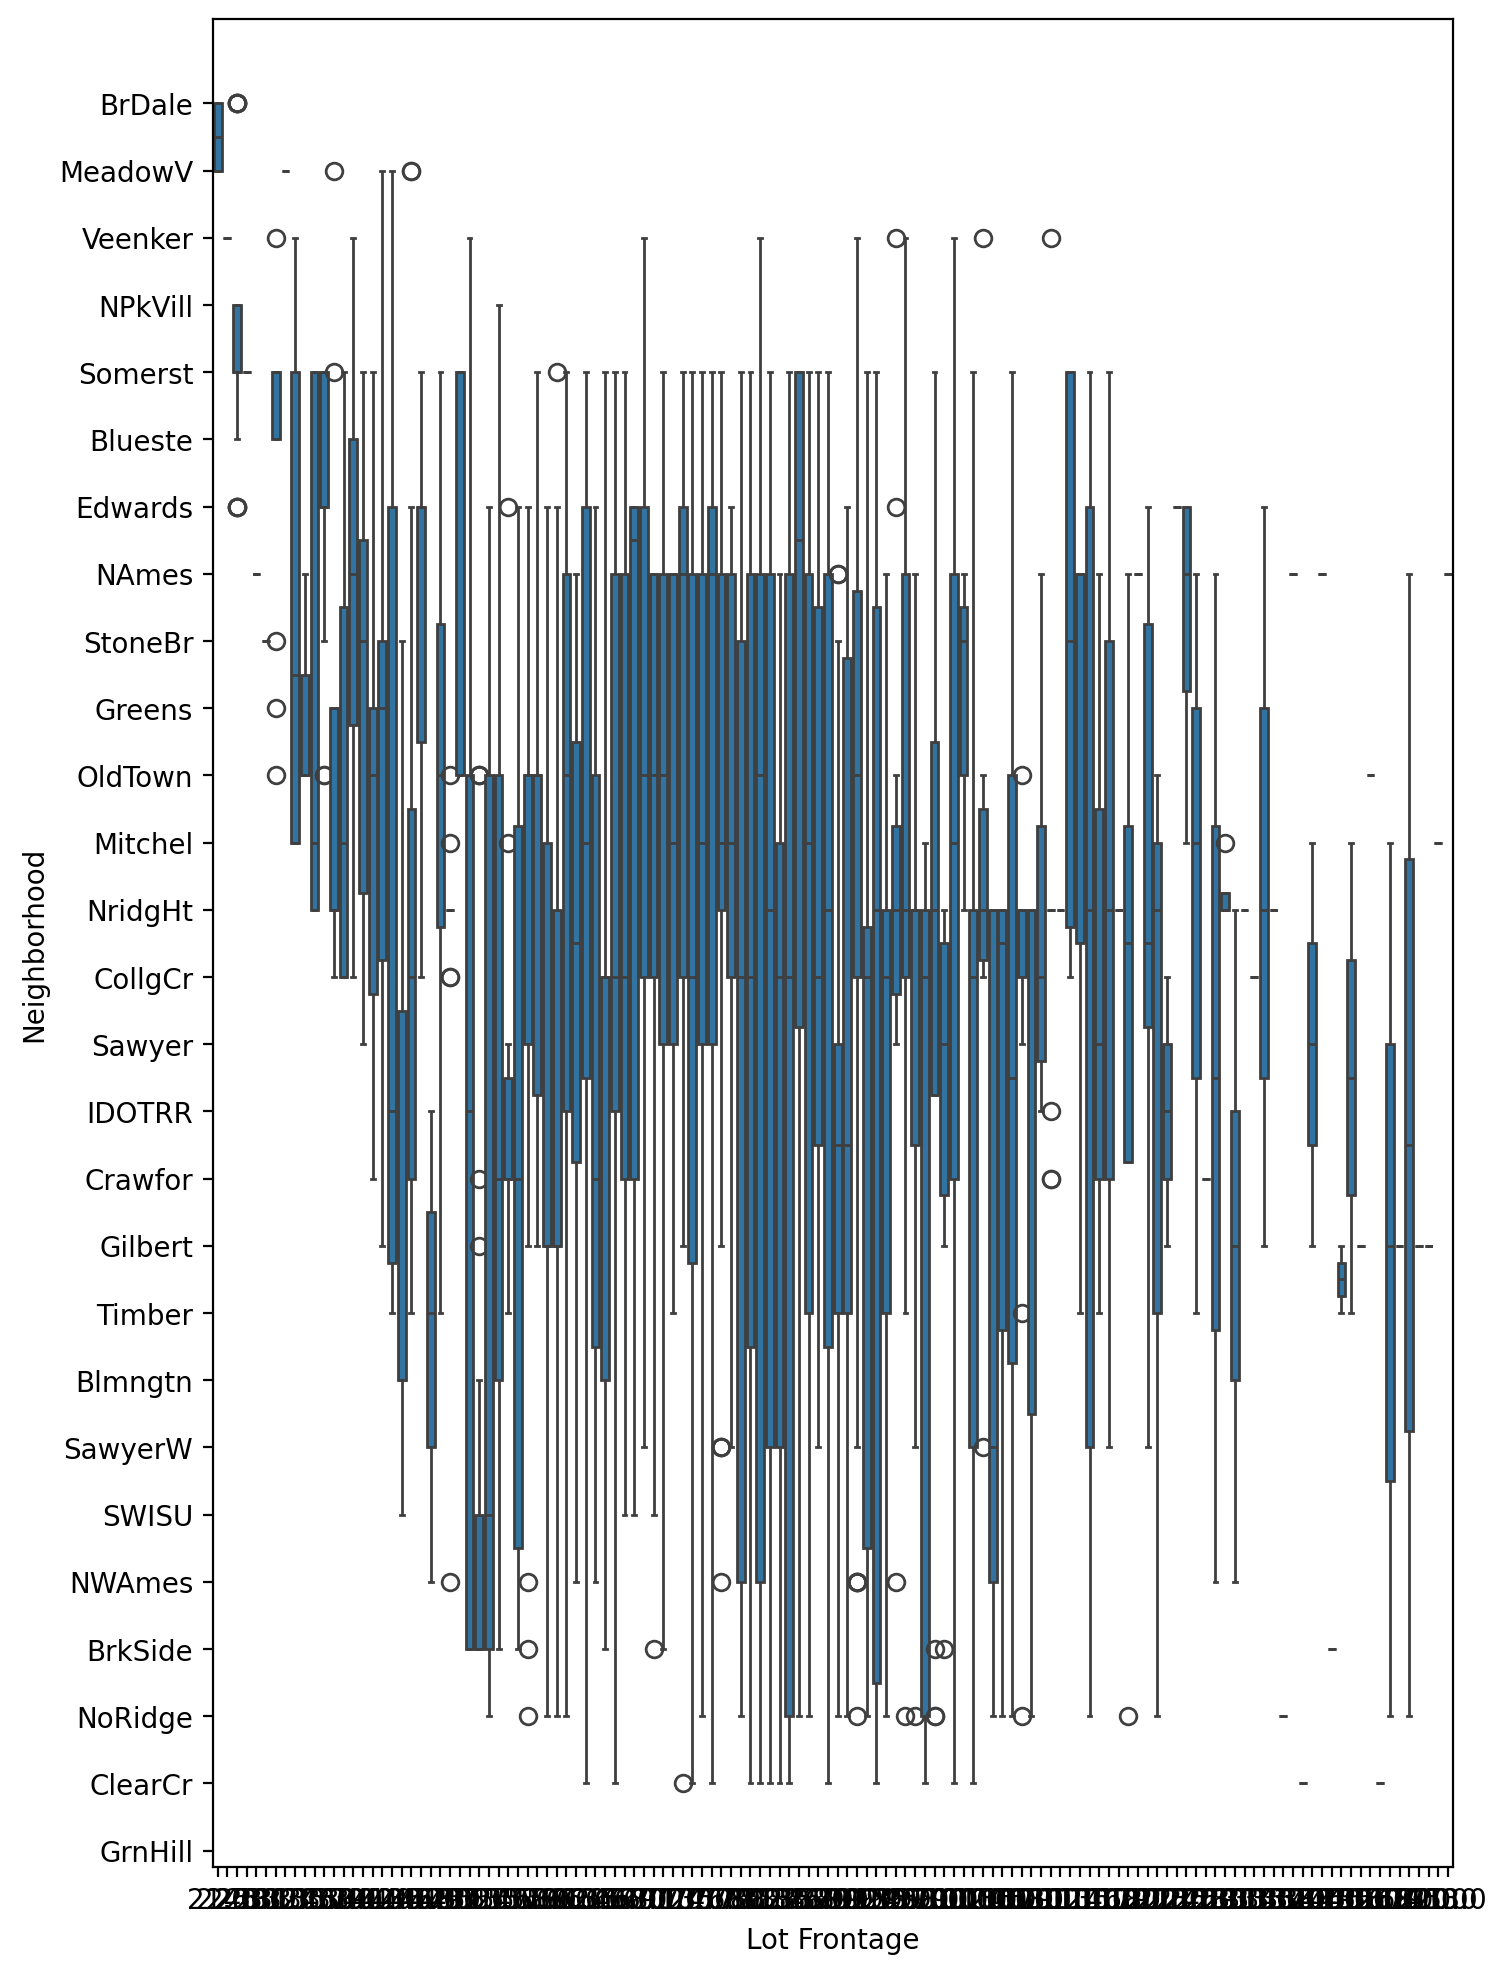

In [ ]:
plt.figure(figsize=(8,12), dpi=200)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data = df, orient='v');

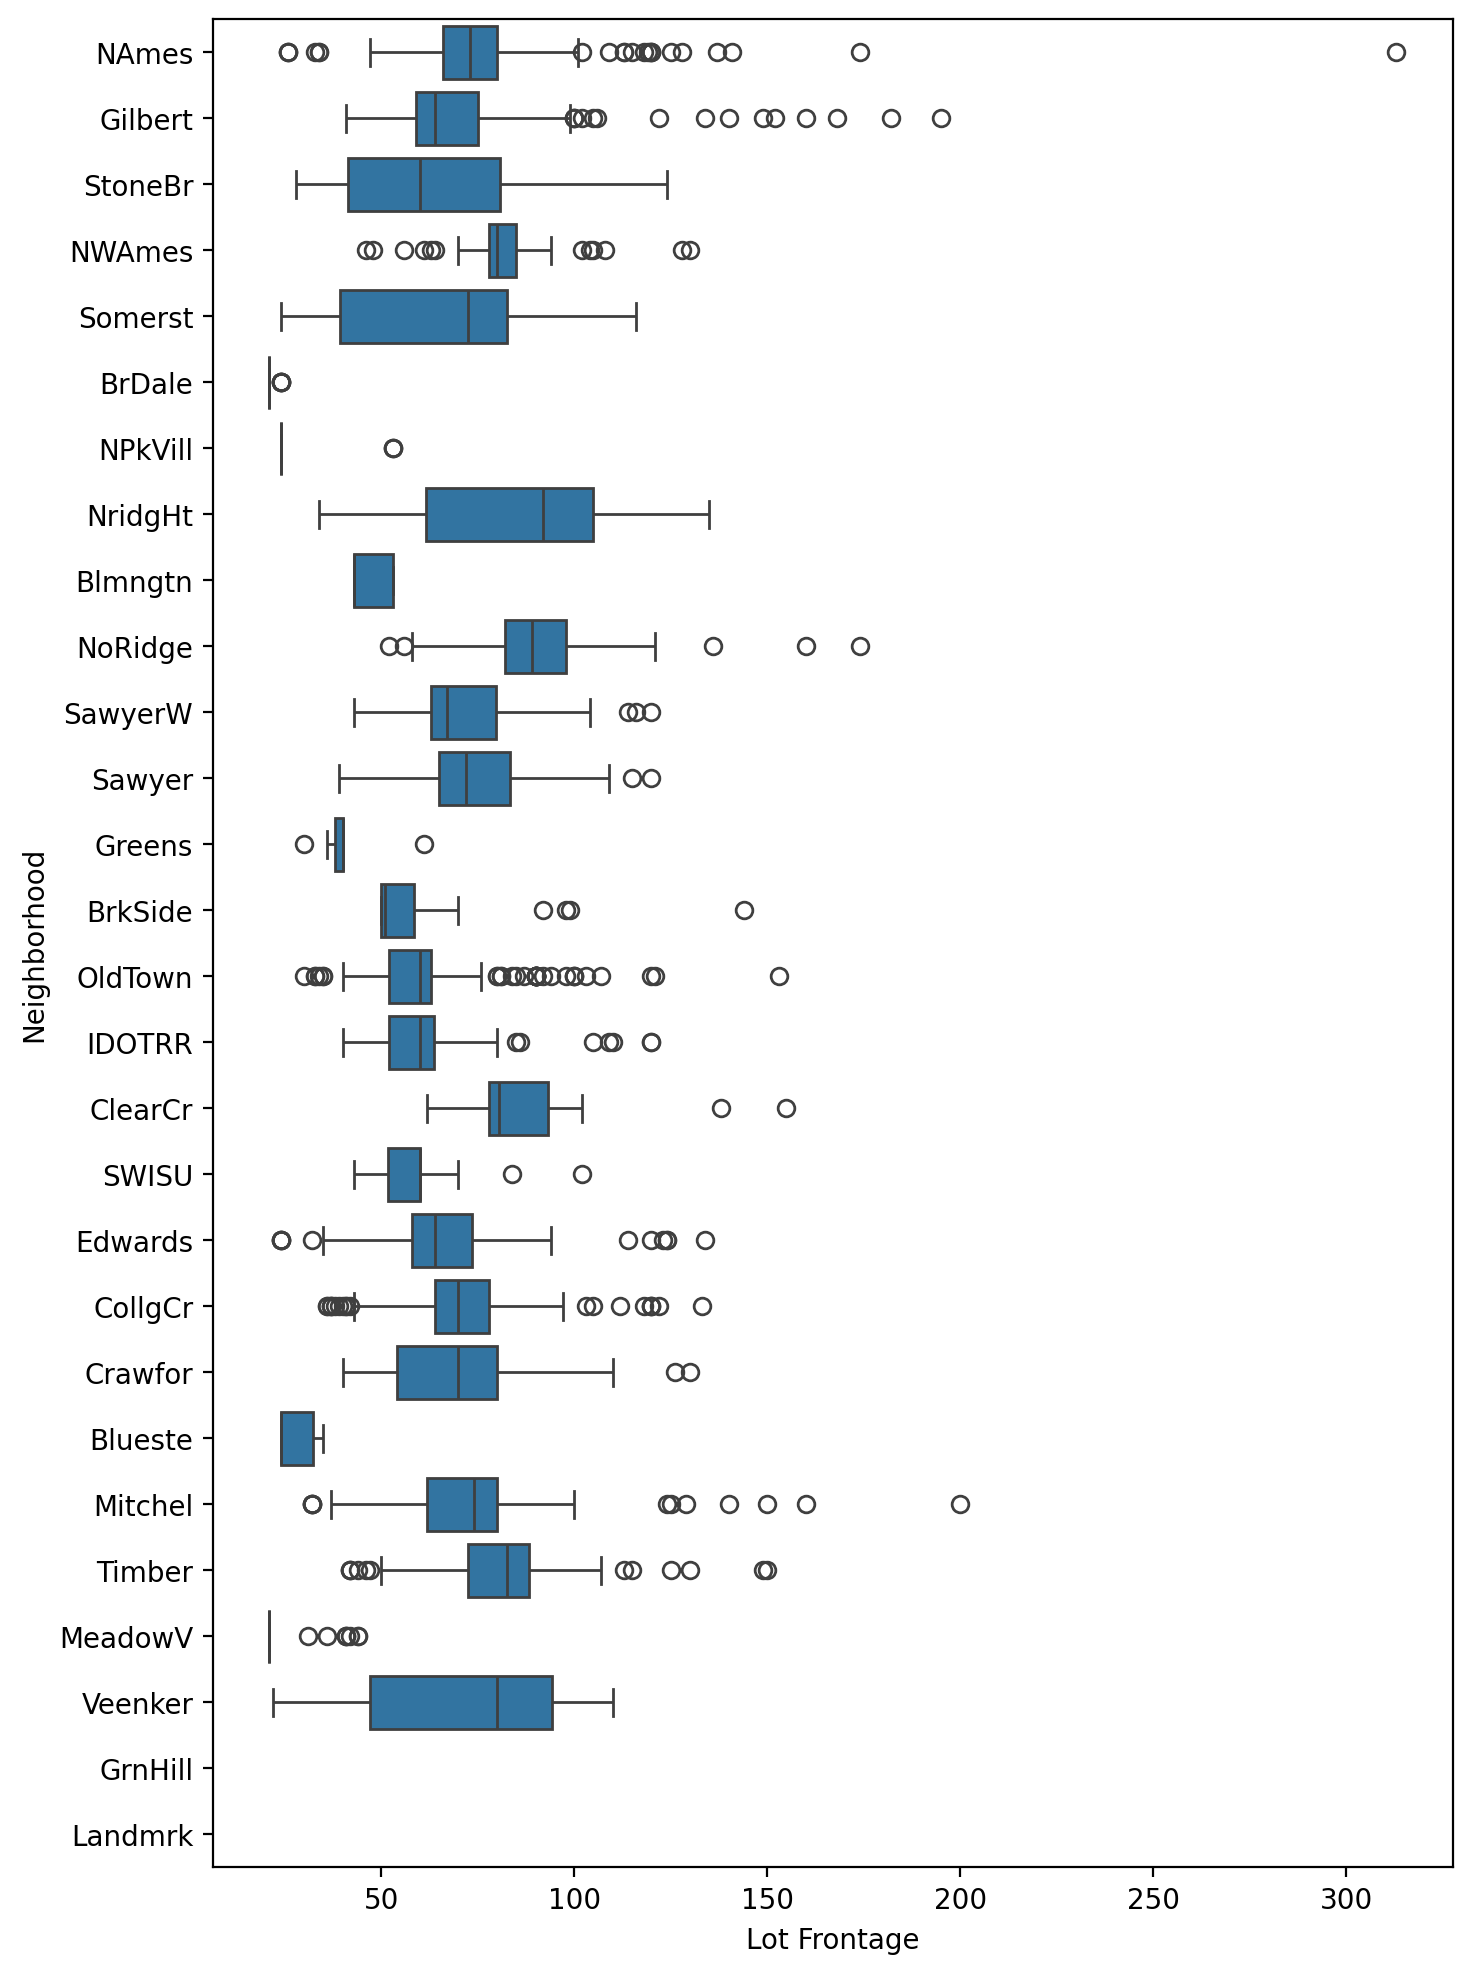

In [ ]:
plt.figure(figsize=(8,12), dpi=200)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data = df, orient='h');

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [ ]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [ ]:
df['Lot Frontage']

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [ ]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [ ]:
df['Lot Frontage'] =df['Lot Frontage'].fillna(0)

In [ ]:
df.to_csv('Ames_DropNa_REM')

#### DEALING WITH CATEGORICAL DATA:

In [ ]:
df = pd.read_csv('Jose Lects/DATA/Ames_NO_Missing_Data.csv')
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [ ]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [ ]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [ ]:
direction = pd.Series(['Up', 'Up', 'Down'])
direction

0      Up
1      Up
2    Down
dtype: object

In [ ]:
pd.get_dummies(direction,drop_first=True)

,Up
0,True
1,True
2,False


In [ ]:
pd.get_dummies(direction)

,Down,Up
0,False,True
1,False,True
2,True,False


In [ ]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
#df.info()
my_object_df = df.select_dtypes(include='object')

In [ ]:
my_numeric_df = df.select_dtypes(exclude='object')

In [ ]:
df_objects_dummies = pd.get_dummies(my_object_df,drop_first=True)
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2921,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2922,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2923,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
final_df = pd.concat([my_numeric_df,df_objects_dummies], axis=1)
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,False,False,False,False,True,False,False,False,True,False
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,False,False,False,False,True,False,False,False,True,False
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,False,False,False,False,True,False,False,False,True,False
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA        -0.591459
Kitchen Qual_TA      -0.527461
Bsmt Qual_TA         -0.453022
Garage Finish_Unf    -0.422363
Garage Type_Detchd   -0.365209
                        ...   
Garage Cars           0.648488
Total Bsmt SF         0.660983
Gr Liv Area           0.727279
Overall Qual          0.802637
SalePrice             1.000000
Name: SalePrice, Length: 263, dtype: float64

In [ ]:
#! pip install plotly --upgrade

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
#!pip install chart-studio

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
import chart_studio

In [ ]:
import chart_studio.plotly as py

In [ ]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [ ]:
init_notebook_mode(connected=True)

In [ ]:
import plotly.graph_objs as go

In [ ]:
data = dict(type = 'choropleth',
           locations = ['AZ','CA','NY'],
           locationmode = 'USA-states',
           colorscale = 'Portland',
           text = ['text 1','text 2','text 3'],
           z = [1.0,2.0,3.0],
           colorbar = {'title':'Colorbar Title Goes Here'})

In [ ]:
data

{'type': 'choropleth',
 'locations': ['AZ', 'CA', 'NY'],
 'locationmode': 'USA-states',
 'colorscale': 'Portland',
 'text': ['text 1', 'text 2', 'text 3'],
 'z': [1.0, 2.0, 3.0],
 'colorbar': {'title': 'Colorbar Title Goes Here'}}

In [ ]:
layout = dict(geo={'scope':'usa'})

In [ ]:
choromap = go.Figure(data = [data],layout=layout);

In [ ]:
#iplot(choromap)

### Cross Validation -- Train Test Split

In [ ]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df.drop('sales',axis=1)

In [ ]:
y = df['sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=100)

In [ ]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

7.341775789034129

In [ ]:
r2_score(y_test,y_pred)

0.7399499443992823

In [ ]:
model_1 = Ridge(alpha=1)

In [ ]:
model_1.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
y_pred_1 = model_1.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_1)

2.3190215794287523

In [ ]:
r2_score(y_test,y_pred_1)

0.9178588793775941

#### Cross Validation - Test validation Train Test Split

In [ ]:
X = df.drop('sales', axis=1)

y = df['sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X,y, test_size=0.3, random_state = 101)

In [ ]:
# test_size = 0.5 (50% 0f 30% other ----> 15% of all data)
X_eval, X_test, y_eval, y_test = train_test_split(X_other,y_other,test_size=0.5, random_state=101)

In [ ]:
len(df)

200

In [ ]:
len(X_train)

140

In [ ]:
len(X_eval)

30

In [ ]:
len(X_test)

30

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_eval = scaler.transform(X_eval)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model_2 = Ridge(alpha=100)

In [ ]:
model_2.fit(X_train,y_train)

Ridge(alpha=100)

In [ ]:
y_eval_pred = (model.predict(X_eval))

In [ ]:
mean_squared_error(y_eval,y_eval_pred)

7.320101458823872

In [ ]:
r2_score(y_eval,y_eval_pred)

0.7276645528191791

In [ ]:
model_3 = Ridge(alpha=1)

In [ ]:
model_3.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
new_pred_eval = model_3.predict(X_eval)

In [ ]:
mean_squared_error(y_eval,new_pred_eval)

2.3837830750569884

In [ ]:
r2_score(y_eval,new_pred_eval)

0.9113142579540117

In [ ]:
y_final_test_pred = model_3.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_final_test_pred)

2.254260083800517

In [ ]:
r2_score(y_test,y_final_test_pred)

0.9237892400906466

#### Cross Val Validation - Cross_val_score Function

In [ ]:
X = df.drop('sales', axis=1)
y = df['sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model = Ridge(alpha=100)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [ ]:
abs(scores.mean())

8.215396464543607

In [ ]:
model_a = Ridge(alpha=1)

In [ ]:
scores = cross_val_score(model_a,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
abs(scores.mean())

3.344839296530696

In [ ]:
model_a.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
y_final_test_pred_1 = model_a.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_final_test_pred_1)

2.3190215794287523

In [ ]:
r2_score(y_test,y_final_test_pred_1)

0.9178588793775941

### Cross_Validate -- cross_validate Function

In [ ]:
X = df.drop('sales',axis=1)
y = df['sales']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

#SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = Ridge(alpha=100)

In [ ]:
scores = cross_validate(model, X_train,y_train, scoring=['neg_mean_squared_error',
                                                         'neg_mean_absolute_error'], cv=10)

In [ ]:
scores

{'fit_time': array([0.0030098 , 0.0010004 , 0.00096774, 0.0009613 , 0.00102115,
        0.0009923 , 0.00100064, 0.00099969, 0.00099993, 0.00100017]),
 'score_time': array([0.00199151, 0.0009985 , 0.00100255, 0.00102735, 0.0009737 ,
        0.00099421, 0.00199795, 0.00100017, 0.00099969, 0.0010004 ]),
 'test_neg_mean_squared_error': array([ -6.06067062, -10.62703078,  -3.99342608,  -5.00949402,
         -9.14179955, -13.08625636,  -3.83940454,  -9.05878567,
         -9.05545685,  -5.77888211]),
 'test_neg_mean_absolute_error': array([-1.8102116 , -2.54195751, -1.46959386, -1.86276886, -2.52069737,
        -2.45999491, -1.45197069, -2.37739501, -2.44334397, -1.89979708])}

In [ ]:
scores = pd.DataFrame(scores)

In [ ]:
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.003010,0.001992,-6.060671,-1.810212
1,0.001000,0.000998,-10.627031,-2.541958
2,0.000968,0.001003,-3.993426,-1.469594
3,0.000961,0.001027,-5.009494,-1.862769
4,0.001021,0.000974,-9.141800,-2.520697
5,0.000992,0.000994,-13.086256,-2.459995
6,0.001001,0.001998,-3.839405,-1.451971
7,0.001000,0.001000,-9.058786,-2.377395
8,0.001000,0.001000,-9.055457,-2.443344
9,0.001000,0.001000,-5.778882,-1.899797


In [ ]:
scores.mean()

fit_time                        0.001195
score_time                      0.001199
test_neg_mean_squared_error    -7.565121
test_neg_mean_absolute_error   -2.083773
dtype: float64

In [ ]:
model = Ridge(alpha=1)

In [ ]:
scores = cross_validate(model, X_train,y_train, scoring=['neg_mean_squared_error',
                                                         'neg_mean_absolute_error'], cv=10)

In [ ]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.002005,0.002996,-2.962508,-1.457174
1,0.002049,0.002002,-3.057378,-1.555308
2,0.001982,0.000998,-2.173740,-1.238770
3,0.001000,0.001031,-0.833034,-0.768938
4,0.000999,0.001000,-3.464018,-1.434489
5,0.000973,0.001027,-8.232647,-1.494316
6,0.001000,0.001000,-1.905864,-1.081362
7,0.000999,0.000999,-2.765048,-1.250011
8,0.001969,0.001033,-4.989505,-1.580971
9,0.000999,0.002000,-2.846438,-1.223326


In [ ]:
scores.mean()

fit_time                        0.001397
score_time                      0.001409
test_neg_mean_squared_error    -3.323018
test_neg_mean_absolute_error   -1.308467
dtype: float64

In [ ]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
y_final_pred = model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_final_pred)

2.3190215794287523

In [ ]:
r2_score(y_test,y_final_pred)

0.9178588793775941

#### GRIDSEARCHCV...

In [ ]:
X = df.drop('sales',axis=1)
y = df['sales']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

#SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
#help(ElasticNet)

In [ ]:
base_elastic_net_model = ElasticNet()

In [ ]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[0.1,0.5,0.7,0.95,0.99,1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(estimator=base_elastic_net_model,
                         param_grid=param_grid,
                         scoring= 'neg_mean_squared_error',
                         cv=5,verbose=2)

In [ ]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [ ]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [ ]:
grid_model.cv_results_

{'mean_fit_time': array([0.00220795, 0.00150661, 0.00120039, 0.00099916, 0.00099945,
        0.00099969, 0.00100055, 0.00119925, 0.00099964, 0.00170388,
        0.00140615, 0.001194  , 0.00119944, 0.00139847, 0.00139399,
        0.00180063, 0.00139852, 0.00139942, 0.00153837, 0.00159106,
        0.0019959 , 0.00159297, 0.00179205, 0.00100236, 0.00120101,
        0.00179582, 0.00139294, 0.00120077, 0.00100031, 0.00179925,
        0.00140181, 0.00100241, 0.0012001 , 0.00173492, 0.00119996,
        0.00142832]),
 'std_fit_time': array([1.95186783e-03, 1.03835464e-03, 4.00805484e-04, 1.76751642e-06,
        2.03983780e-06, 1.64491542e-06, 5.13569337e-07, 4.00663937e-04,
        1.68856918e-06, 1.17217563e-03, 4.98797865e-04, 4.03093637e-04,
        4.00093013e-04, 4.92717375e-04, 4.95816607e-04, 1.16889574e-03,
        4.90509324e-04, 4.88889411e-04, 6.94209737e-04, 4.87541606e-04,
        8.96161615e-04, 4.97751729e-04, 3.96744752e-04, 3.08804986e-06,
        4.16867658e-04, 7.36349788e-0

In [ ]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002208,1.951868e-03,0.000799,3.995243e-04,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,6
1,0.001507,1.038355e-03,0.000894,2.465680e-04,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,5
2,0.001200,4.008055e-04,0.000600,4.899014e-04,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,4
3,0.000999,1.767516e-06,0.000400,4.899209e-04,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-3.213052,-1.472417,-5.396258,-2.177452,-4.241080,-3.300052,1.406248,3
4,0.000999,2.039838e-06,0.000200,4.000664e-04,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.208124,-1.478489,-5.380242,-2.181097,-4.222968,-3.294184,1.396953,2
5,0.001000,1.644915e-06,0.000601,4.904494e-04,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-3.206943,-1.480065,-5.376257,-2.182076,-4.218460,-3.292760,1.394613,1
6,0.001001,5.135693e-07,0.000400,4.897457e-04,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-9.827475,-5.261525,-11.875347,-7.449195,-8.542329,-8.591174,2.222939,12
7,0.001199,4.006639e-04,0.000604,4.928608e-04,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-8.707071,-4.214228,-10.879261,-6.204545,-7.173031,-7.435627,2.255532,11
8,0.001000,1.688569e-06,0.000800,4.000909e-04,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-7.920870,-3.549562,-10.024877,-5.379553,-6.324836,-6.639940,2.206213,10
9,0.001704,1.172176e-03,0.000400,8.002281e-04,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-6.729435,-2.591285,-8.709842,-4.156317,-5.329916,-5.503359,2.102835,9


In [ ]:
y_pred = grid_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

2.387342642087474

In [ ]:
r2_score(y_test,y_pred)

0.9154389067914471